In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np

In [13]:
files = os.listdir('outputs')

data = {}

for file in files:
    mutation_rate = file.split("_")[1]

    if mutation_rate not in data:
        data[mutation_rate] = []

    data[mutation_rate].append(pd.read_csv('outputs/'+file))

mutation_rates = list(data.keys())

mutation_rates.sort(key=lambda x: float("0."+x[1:]))
mutation_rates

['00', '005', '01', '02', '03', '04', '05']

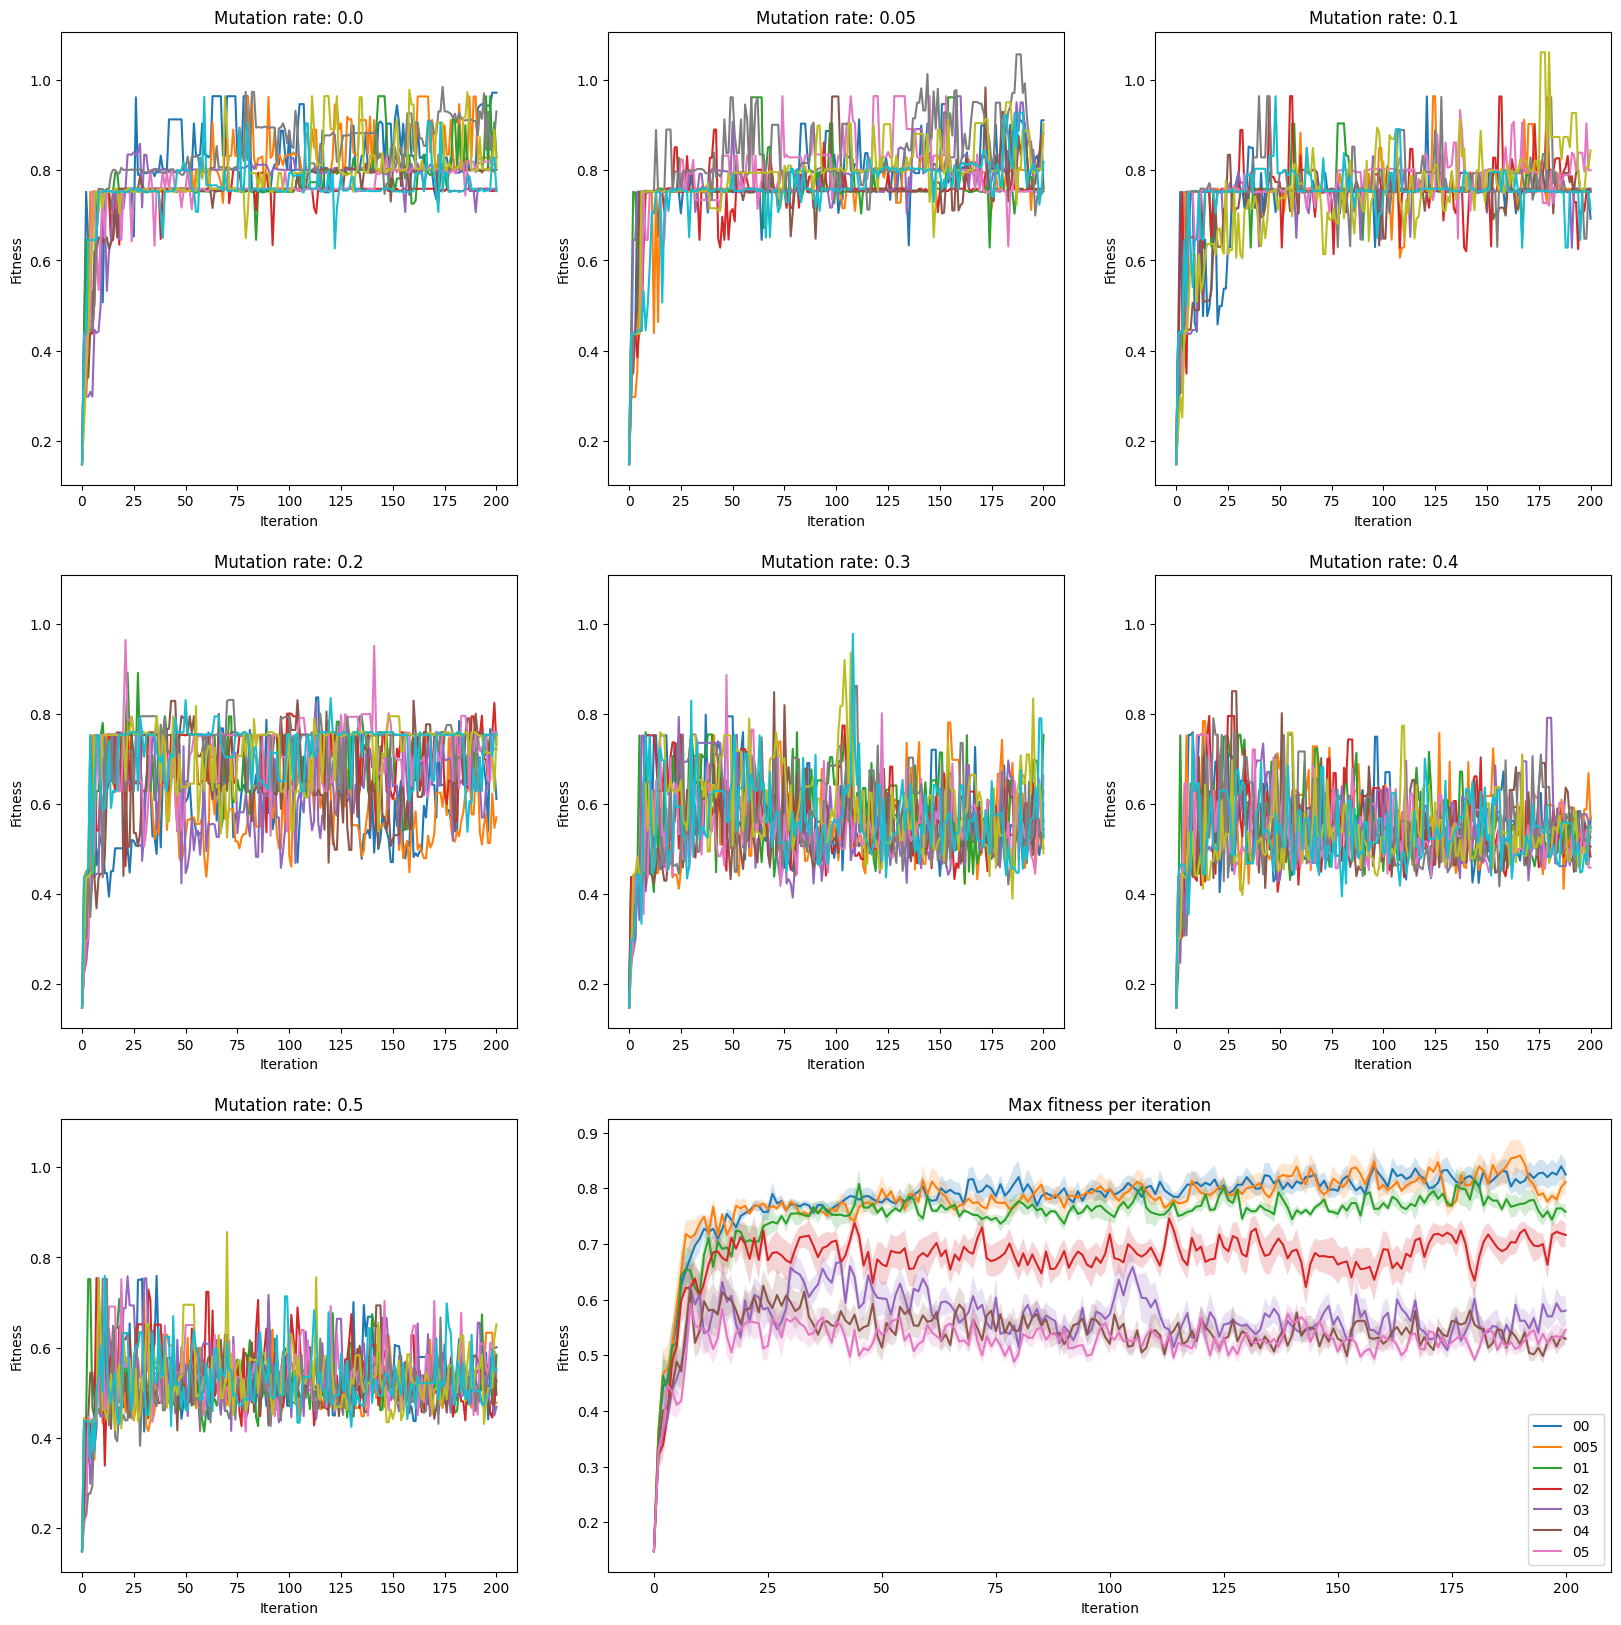

In [52]:
fig = plt.figure(figsize=(20,20))
spec = fig.add_gridspec(ncols=3, nrows=3)

prev_ax = None

for i, mutation_rate in enumerate(mutation_rates):
    ax = fig.add_subplot(3,3, i + 1, sharey=prev_ax)
    prev_ax = ax

    ax.set_title("Mutation rate: 0."+mutation_rate[1:])
    ax.set_ylabel("Fitness")
    ax.set_xlabel("Iteration")

    for p in data[mutation_rate]:
        ax.plot(p['max'])


ax = fig.add_subplot(spec[2, 1:3])

for i, mutation_rate in enumerate(mutation_rates):
    avg = []

    for p in data[mutation_rate]:
        avg.append(p['max'])


    avg = np.array(avg)

    avg_std = np.std(avg, axis=0) / 3
    avg_mean = np.mean(avg, axis=0)

    x = list(range(len(avg_std)))

    ax.plot(x, avg_mean, label=mutation_rate)
    ax.fill_between(x, avg_mean-avg_std, avg_mean+avg_std, alpha=0.2)
    ax.set_ylabel("Fitness")
    ax.set_xlabel("Iteration")

ax.set_title("Max fitness per iteration")
ax.legend()